## **Mounting drive and import statements**

- Mount google drive and import libraries

In [1]:
## To load up drive

%cd drive/MyDrive/CSE_519_assignment/hw3

/content/drive/MyDrive/CSE_519_assignment/hw3


In [2]:
## Import statements

import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import permutation_test_score
from scipy import stats

root_dir = os.getcwd()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## **Q1Reading store data and train data, visualization and data combination**

- Read store data, train data, test data.
- Check missing elements and handle them(Drop, fill with mean).
- Merge store data with train data into a single dataframe. 

In [3]:
store_df = pd.read_csv(root_dir + "/store.csv")

In [4]:
train_df = pd.read_csv(root_dir + "/train.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
test_df = pd.read_csv(root_dir + "/test.csv")

In [6]:
store_df.shape

(1115, 10)

In [7]:
train_df.shape

(1017209, 9)

In [8]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [12]:
missing = train_df.isnull().sum()
missing.sort_values(ascending=False)

SchoolHoliday    0
StateHoliday     0
Promo            0
Open             0
Customers        0
Sales            0
Date             0
DayOfWeek        0
Store            0
dtype: int64

In [13]:
train_df['SalesPerCustomer'] = train_df['Sales']/train_df['Customers']

In [14]:
train_df.dropna(inplace=True)

In [15]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [16]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)

In [17]:
store_df.fillna(0, inplace = True)

In [18]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [19]:
train_df = train_df.merge(right=store_df, on='Store', how='left')

In [20]:
train_df.shape

(844340, 19)

In [21]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


## **Converting string of date to datetime object and segregating to year, month, day, week_of_year, year_week**


In [22]:
train_df['Date'] = pd.to_datetime(train_df["Date"])
train_df["year"] = train_df["Date"].dt.year
train_df["month"] = train_df["Date"].dt.month
train_df["day"] = train_df["Date"].dt.day
train_df["week_of_year"] = train_df["Date"].dt.isocalendar().week
train_df["year_week"] = train_df["Date"].dt.strftime("%Y-%W")


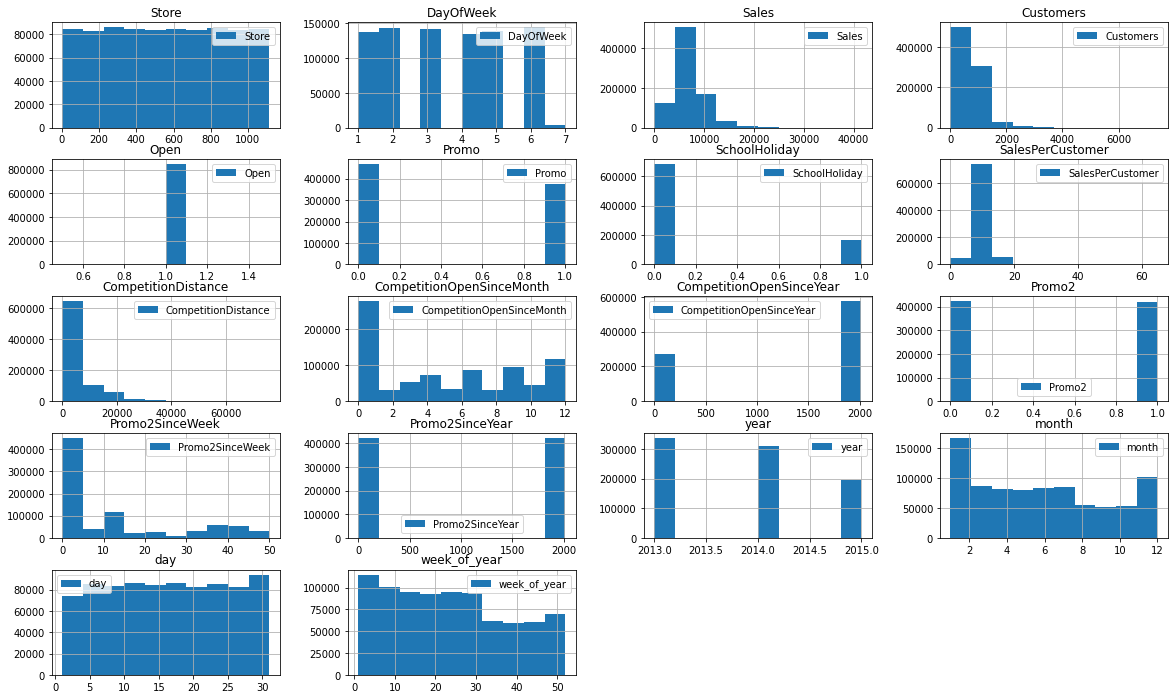

In [23]:
train_df.hist(figsize=(20,12), legend=True)
plt.show()

## **Analysis of different type of holidays with sales**
- Combining "0" with 0 and making single entity.
- Plotting sales on holidays vs all days
- Take out 3 categories of holidays(holiday_a, holiday_b, holiday_c)
- Compute sales a week before each date belonging to each category.
- Plot the above calculation with the sales on the aggregation on holidays

In [24]:
train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [25]:
train_df["StateHoliday"].loc[train_df["StateHoliday"] == 0] = "0"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [26]:
train_df['SchoolHoliday'].unique()

array([1, 0])

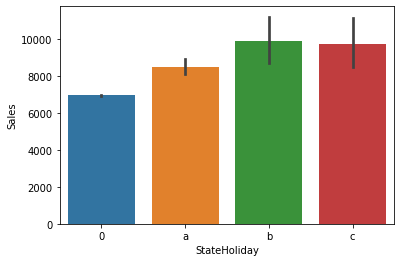

In [27]:
## Holidays + no_holidays
sns.barplot(x='StateHoliday', y='Sales', data=train_df)

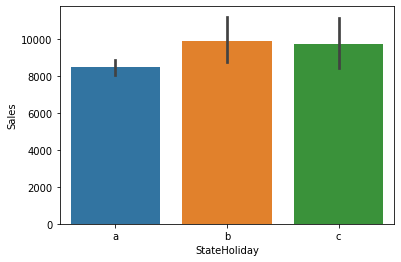

In [28]:
## Holidays only
mask = (train_df["StateHoliday"] != "0") & (train_df["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=train_df[mask])

## Find how much sales each type of StateHoliday has

In [29]:
sales_per_day = train_df.groupby(['Date', 'StateHoliday']).agg({'Sales': 'sum'}).reset_index()
sales_per_day.head()

,Date,StateHoliday,Sales
0,2013-01-01,a,97235
1,2013-01-02,0,6949829
2,2013-01-03,0,6347820
3,2013-01-04,0,6638954
4,2013-01-05,0,5951593


In [30]:
holidays_df = sales_per_day[sales_per_day['StateHoliday'] != "0"]
holiday_a = holidays_df[holidays_df['StateHoliday']=='a']
holiday_b = holidays_df[holidays_df['StateHoliday']=='b']
holiday_c = holidays_df[holidays_df['StateHoliday']=='c']
non_holidays = sales_per_day[sales_per_day['StateHoliday'] == "0"]

## Helper function to check 7 days before holiday and plot the sales against the sales of the holiday

In [31]:
def compute_sales_for_previous_days(df, type):
  dates = df['Date'].to_list()
  temp_df = pd.DataFrame(columns=['Date', 'Before_Holidays', 'During_Holidays'])
  days = datetime.timedelta(7)
  for date in dates:
    prev_date = date - days
    sales = non_holidays[(non_holidays['Date'] >= prev_date) & (non_holidays['Date'] < date)]['Sales'].sum()
    temp_df = temp_df.append({'Date': date, 'Before_Holidays': int(df[df['Date'] == date]['Sales'].values), 'During_Holidays': sales}, ignore_index=True)
  temp_df["During_Holidays"] = temp_df["During_Holidays"]/25
  temp_df.plot(x='Date', y=['Before_Holidays', 'During_Holidays'], kind='bar')

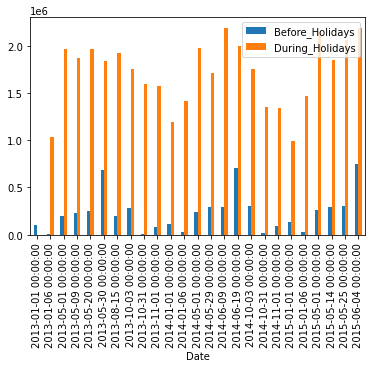

In [32]:
compute_sales_for_previous_days(holiday_a,"a")

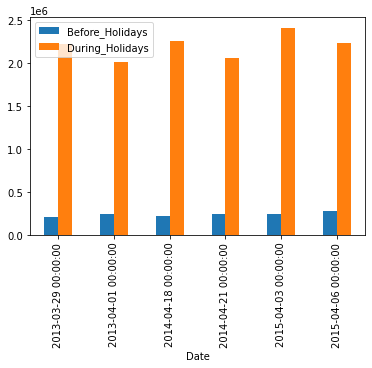

In [33]:
compute_sales_for_previous_days(holiday_b,"b")

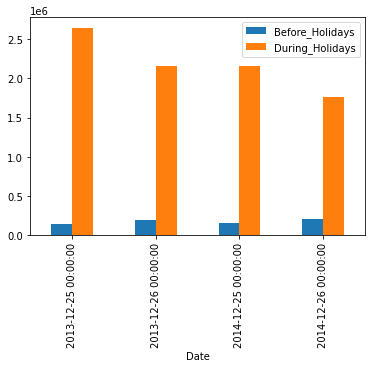

In [34]:
compute_sales_for_previous_days(holiday_c,"c")

## **Calculation of the top 5 and bottom 5 stores on basis of sales**
- Group stores on basis of sum of sales and sort them
- Take out the top 5 and bottom 5

In [35]:
sales_per_store = train_df.groupby(['Store', 'Date']).agg({'Sales': 'sum'}).reset_index()
sales_per_store.head()

,Store,Date,Sales
0,1,2013-01-02,5530
1,1,2013-01-03,4327
2,1,2013-01-04,4486
3,1,2013-01-05,4997
4,1,2013-01-07,7176


In [36]:
sorted_sales = sales_per_store.sort_values(['Sales'], ascending=False)
sorted_sales.head()

,Store,Date,Sales
687637,909,2015-06-22,41551
197444,262,2015-04-03,38722
197472,262,2015-05-01,38484
197485,262,2015-05-14,38367
42684,57,2014-06-16,38037


In [37]:
top_five = sorted_sales[:5]
print(top_five)

        Store       Date  Sales
687637    909 2015-06-22  41551
197444    262 2015-04-03  38722
197472    262 2015-05-01  38484
197485    262 2015-05-14  38367
42684      57 2014-06-16  38037


In [38]:
bottom_five = sorted_sales[-5:]
print(bottom_five)

        Store       Date  Sales
827030   1093 2013-06-03    133
679728    898 2015-01-31    124
493191    652 2014-11-22     46
832877   1100 2014-04-29      0
716688    948 2013-04-25      0


## **Plotting the 5 top and 5 bottom stores on bases of sales with respect to sales of each week**
- For each store, group it's sales by week_of_year and year_week and plot it against the sales

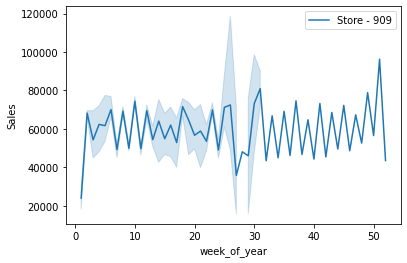

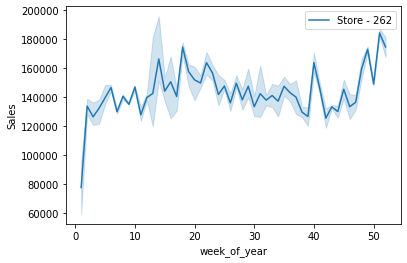

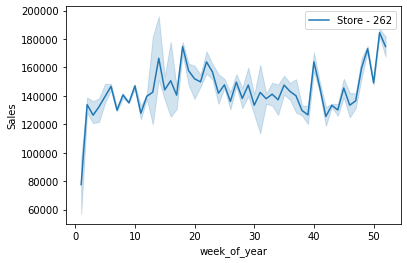

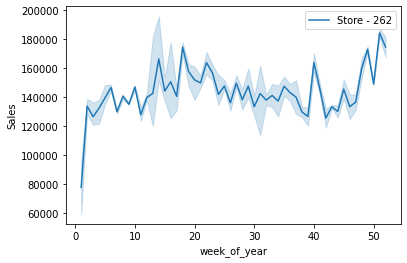

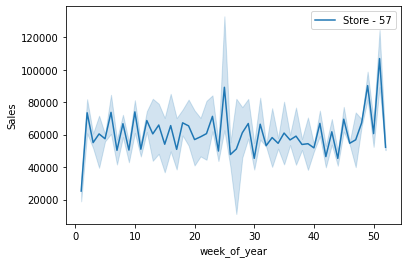

In [39]:
for store in top_five["Store"].to_list():
  df = train_df[train_df["Store"] == store]
  grouped_by_week_df = df[['week_of_year', 'year_week', 'Sales']].groupby(['year_week', 'week_of_year']).agg({'Sales': 'sum'}).reset_index()
  label = f"Store - {store}"
  sns.lineplot(x='week_of_year', y="Sales", data=grouped_by_week_df, label=label)
  plt.show()

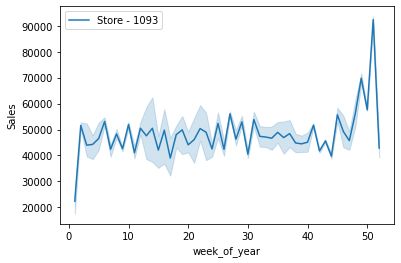

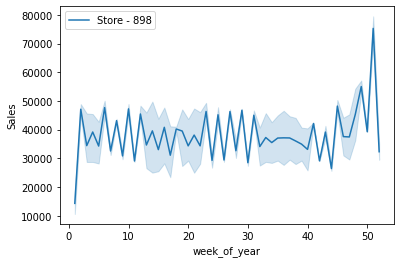

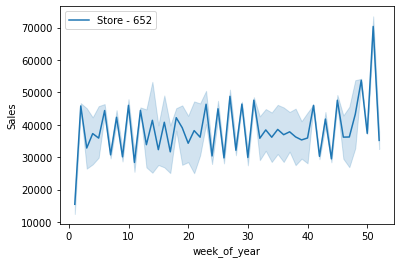

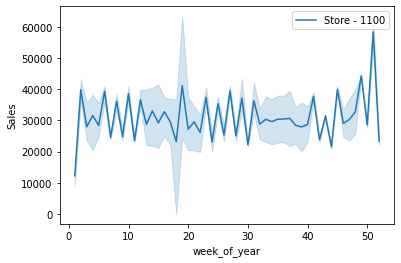

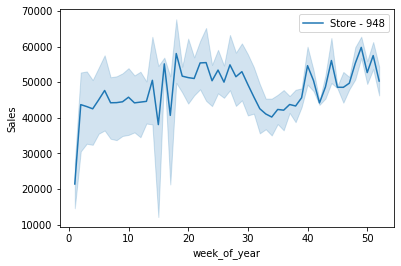

In [40]:
for store in bottom_five["Store"].to_list():
  df = train_df[train_df["Store"] == store]
  grouped_by_week_df = df[['week_of_year', 'year_week', 'Sales']].groupby(['year_week', 'week_of_year']).agg({'Sales': 'sum'}).reset_index()
  label = f"Store - {store}"
  sns.lineplot(x='week_of_year', y="Sales", data=grouped_by_week_df, label=label)
  plt.show()

## **Analyzis of sales with competitors**
- First, we need to modify the types of the columns.
- Calculating since when the competition has been open and storing 0 if it's negative.
- Grouping based on store, competitionopen, competitiondistance and date - it will give us data related to competitors.
- Group the most near competitions and plot them.

In [41]:
# competition
train_df['CompetitionOpenSinceMonth'] = train_df['CompetitionOpenSinceMonth'].astype( 'int64' )
train_df['CompetitionOpenSinceYear'] = train_df['CompetitionOpenSinceYear'].astype( 'int64' )

In [42]:
train_df['CompetitionOpen'] = 12 * (train_df['year'] - train_df['CompetitionOpenSinceYear']) + (train_df['month'] - train_df['CompetitionOpenSinceMonth'])
train_df['CompetitionOpen'] = train_df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x)

In [43]:
competitor_data = train_df.groupby(['Store', 'Date', 'CompetitionDistance',	'CompetitionOpen']).agg({'Sales': 'sum'}).reset_index()
competitor_data.head()

,Store,Date,CompetitionDistance,CompetitionOpen,Sales
0,1,2013-01-02,1270.0,52,5530
1,1,2013-01-03,1270.0,52,4327
2,1,2013-01-04,1270.0,52,4486
3,1,2013-01-05,1270.0,52,4997
4,1,2013-01-07,1270.0,52,7176


In [44]:
competitor_data["week_of_year"] = competitor_data["Date"].dt.isocalendar().week
competitor_data["year_week"] = competitor_data["Date"].dt.strftime("%Y-%W")
competitor_data.head()

,Store,Date,CompetitionDistance,CompetitionOpen,Sales,week_of_year,year_week
0,1,2013-01-02,1270.0,52,5530,1,2013-00
1,1,2013-01-03,1270.0,52,4327,1,2013-00
2,1,2013-01-04,1270.0,52,4486,1,2013-00
3,1,2013-01-05,1270.0,52,4997,1,2013-00
4,1,2013-01-07,1270.0,52,7176,2,2013-01


In [45]:
sales_per_week = competitor_data.groupby(['week_of_year', 'year_week', 'Store', 'CompetitionDistance', 'CompetitionOpen']).agg({'Sales': 'sum'}).reset_index()
sales_per_week.head()

,week_of_year,year_week,Store,CompetitionDistance,CompetitionOpen,Sales
0,1,2013-00,1,1270.0,52,19340
1,1,2013-00,2,570.0,62,15407
2,1,2013-00,3,14130.0,73,23317
3,1,2013-00,4,620.0,40,36816
4,1,2013-00,5,29910.0,0,13764


In [46]:
plot_df = sales_per_week.groupby(['CompetitionDistance','CompetitionOpen']).agg({'Sales': 'mean'}).reset_index()
plot_df.head()

,CompetitionDistance,CompetitionOpen,Sales
0,20.0,24157,25490.6
1,20.0,24158,25430.6
2,20.0,24159,29737.2
3,20.0,24160,25842.8
4,20.0,24161,25466.2


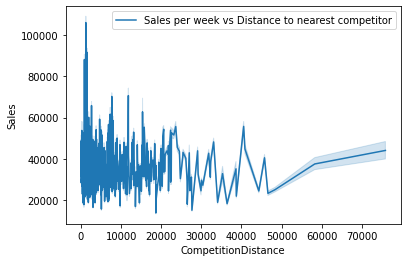

In [47]:
label = "Sales per week vs Distance to nearest competitor"
sns.lineplot(x='CompetitionDistance', y='Sales', data=plot_df, label=label)

## **Plotting pearson correlation for 5 most interesting features**

In [48]:
df_correlation = train_df[["Sales", "CompetitionOpen", "SalesPerCustomer", "SchoolHoliday", "Promo", "DayOfWeek"]]

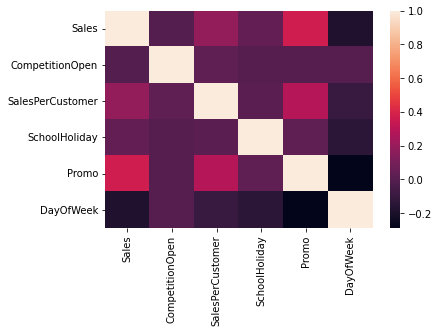

In [49]:
pear_corr = df_correlation.corr(method='pearson')
sns.heatmap(pear_corr)

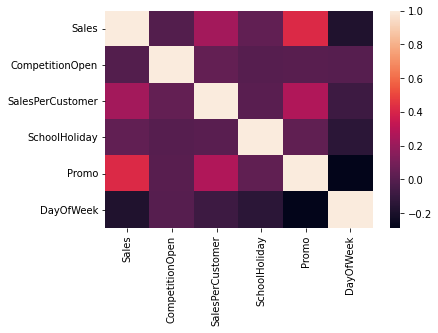

In [50]:
spearman_corr = df_correlation.corr(method='spearman')
sns.heatmap(spearman_corr)

## **Train-test-validation split, permutation test, plots to show informative properties, RMSPE calculation helper function, etc**

- Splitting the train data into validation data and otherwise(Base of if it exists between May-July 2015
- Selecting features which we want to use for model training
- Helper functions to normalize values
- Converting Categorical values to numerical values
- Defined RMSPE helper function
- Doing a single linear regression on "StateHoliday", "Open", "DayOfWeek"
- Printed the RMSPE and p values for each


In [51]:
validation_split_df = train_df[(train_df["Date"] > "2015-05-01") & (train_df["Date"] < "2015-07-31")]
validation_split_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,week_of_year,year_week,CompetitionOpen
1113,1,4,2015-07-30,5020,546,1,1,0,1,9.194139,c,a,1270.0,9,2008,0,0.0,0.0,0,2015,7,30,31,2015-30,82
1114,2,4,2015-07-30,5567,601,1,1,0,1,9.262895,a,a,570.0,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,30,31,2015-30,92
1115,3,4,2015-07-30,8977,823,1,1,0,1,10.907655,a,a,14130.0,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,30,31,2015-30,103
1116,4,4,2015-07-30,10387,1276,1,1,0,1,8.140282,c,c,620.0,9,2009,0,0.0,0.0,0,2015,7,30,31,2015-30,70
1117,5,4,2015-07-30,4943,539,1,1,0,1,9.170686,a,a,29910.0,4,2015,0,0.0,0.0,0,2015,7,30,31,2015-30,3


In [52]:
train_split_df = train_df[(train_df["Date"] < "2015-05-01") | (train_df["Date"] > "2015-07-31")]
train_split_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,week_of_year,year_week,CompetitionOpen
84490,1,4,2015-04-30,6228,650,1,1,0,0,9.581538,c,a,1270.0,9,2008,0,0.0,0.0,0,2015,4,30,18,2015-17,79
84491,2,4,2015-04-30,6884,716,1,1,0,0,9.614525,a,a,570.0,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,4,30,18,2015-17,89
84492,3,4,2015-04-30,9971,979,1,1,0,0,10.184883,a,a,14130.0,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,4,30,18,2015-17,100
84493,4,4,2015-04-30,16106,1854,1,1,0,0,8.687163,c,c,620.0,9,2009,0,0.0,0.0,0,2015,4,30,18,2015-17,67
84494,5,4,2015-04-30,6598,729,1,1,0,0,9.050754,a,a,29910.0,4,2015,0,0.0,0.0,0,2015,4,30,18,2015-17,0


In [53]:
features = ['DayOfWeek', 'Promo', 'Open', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen']
target = ["Sales"]

## Helper function to normalize features of a dataframe

In [54]:
def normalize_feature(df, column_names_to_normalize):
  result = df.copy()
  for feature_name in column_names_to_normalize:
      max_value = df[feature_name].max()
      min_value = df[feature_name].min()
      result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
  return result

In [55]:
train_split_df = normalize_feature(train_split_df, ["DayOfWeek", "CompetitionDistance", "CompetitionOpen"])
validation_split_df = normalize_feature(validation_split_df, ["DayOfWeek", "CompetitionDistance", "CompetitionOpen"])

In [56]:
print(train_split_df["Assortment"].unique())
print(train_split_df["StoreType"].unique())

['a' 'c' 'b']
['c' 'a' 'd' 'b']


## Converting categorical data to numerical format

In [57]:
train_split_df["StoreType"] = train_split_df['StoreType'].map(lambda x: 0 if x == "a" else (1 if x=="b" else (2 if x=="c" else 3)))
train_split_df["Assortment"] = train_split_df['Assortment'].map(lambda x: 0 if x == "a" else (1 if x=="b" else 2))
train_split_df["StateHoliday"] = train_split_df['StateHoliday'].map(lambda x: 0 if x == "0" else (1 if x=="1" else (2 if x=="2" else 3)))

In [58]:
validation_split_df["StoreType"] = validation_split_df['StoreType'].map(lambda x: 0 if x == "a" else (1 if x=="b" else (2 if x=="c" else 3)))
validation_split_df["Assortment"] = validation_split_df['Assortment'].map(lambda x: 0 if x == "a" else (1 if x=="b" else 2))
validation_split_df["StateHoliday"] = validation_split_df['StateHoliday'].map(lambda x: 0 if x == "0" else (1 if x=="1" else (2 if x=="2" else 3)))

In [59]:
train_split_df[features].head()

,DayOfWeek,Promo,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen
84490,0.5,1,1,0,0,2,0,0.016482,0.003267
84491,0.5,1,1,0,0,0,0,0.007252,0.003680
84492,0.5,1,1,0,0,0,0,0.186050,0.004135
84493,0.5,1,1,0,0,2,2,0.007911,0.002770
84494,0.5,1,1,0,0,0,0,0.394119,0.000000


## Helper function to calculate RMSPE

In [60]:
def root_mean_sqr_err(y_act, y_pred):
  return np.sqrt(np.mean(np.square((y_act-y_pred)/y_act)))

In [61]:
Y = train_split_df[target]
train_split_df = train_split_df[features]

In [62]:
validation_Y = validation_split_df[target]
validation_split_df = validation_split_df[features]

In [63]:
train_split_df.head()

,DayOfWeek,Promo,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen
84490,0.5,1,1,0,0,2,0,0.016482,0.003267
84491,0.5,1,1,0,0,0,0,0.007252,0.003680
84492,0.5,1,1,0,0,0,0,0.186050,0.004135
84493,0.5,1,1,0,0,2,2,0.007911,0.002770
84494,0.5,1,1,0,0,0,0,0.394119,0.000000


In [64]:
train_split_df.dtypes

DayOfWeek              float64
Promo                    int64
Open                     int64
StateHoliday             int64
SchoolHoliday            int64
StoreType                int64
Assortment               int64
CompetitionDistance    float64
CompetitionOpen        float64
dtype: object

In [65]:
X_train, X_test, y_train, y_test = train_test_split(train_split_df, Y, test_size=0.2, random_state=2, shuffle=True)

## Helper function to make linear regression and fit with single feature parameter

In [66]:
def single_regression(X_train, X_test, n_jobs = None, fit_intercept = None):
  if n_jobs and not fit_intercept:
    linear_reg = LinearRegression(n_jobs=n_jobs)
  elif fit_intercept and not n_jobs:
    linear_reg = LinearRegression(fit_intercept=fit_intercept)
  elif n_jobs and fit_intercept:
    linear_reg = LinearRegression(fit_intercept=fit_intercept, n_jobs=n_jobs)
  else:
    linear_reg = LinearRegression()
  linear_reg.fit(X_train, y_train.values.ravel())
  y_pred = linear_reg.predict(X_test)
  return y_pred, linear_reg

## Helper function to calculate the scores, RMSPE

In [67]:
def get_scores(X_train, X_test, y_pred, m, is_validation_required= False, validation_pred= None, p_score=None):
  print(f"Training score is {m.score(X_train, y_train.values.ravel())}")
  print(f"Test score is {m.score(X_test, y_test)}")
  if is_validation_required:
    print(f"Training RMSPE is {root_mean_sqr_err(y_test, y_pred)}")
    print(f"Validation score is {m.score(validation_split_df, validation_Y)}")
    print(f"Validation RMSPE is {root_mean_sqr_err(validation_Y, validation_pred)}")
  else:
    print(f"Training RMSPE is {root_mean_sqr_err(y_test.values.ravel(), y_pred)}")
  if p_score:
    score_rand, perm_scores_rand, pvalue_rand = permutation_test_score(m, X_test, y_test.values.ravel(), scoring="neg_root_mean_squared_error", cv=None, n_permutations=100)
    print(f"p value is {pvalue_rand}")

## Doing a single linear regression on "StateHoliday", "Open", "DayOfWeek"
## Printed the RMSPE and p values for each Q6


In [68]:
y_pred, model = single_regression(X_train[["StateHoliday"]], X_test[["StateHoliday"]])
get_scores(X_train=X_train[["StateHoliday"]], X_test=X_test[["StateHoliday"]], y_pred=y_pred, m=model, p_score=True)

Training score is 0.00030475815418995467
Test score is 0.00033944509104955056
Training RMSPE is 0.6134038263104136
p value is 0.009900990099009901


In [69]:
y_pred, model = single_regression(X_train[["Open"]], X_test[["Open"]])
get_scores(X_train=X_train[["Open"]], X_test=X_test[["Open"]], y_pred=y_pred, m=model, p_score=True)

Training score is 0.0
Test score is -1.299608954585807e-05
Training RMSPE is 0.6128061431957704
p value is 0.7128712871287128


In [70]:
y_pred, model = single_regression(X_train[["DayOfWeek"]], X_test[["DayOfWeek"]])
get_scores(X_train=X_train[["DayOfWeek"]], X_test=X_test[["DayOfWeek"]], y_pred=y_pred, m=model, p_score=True)

Training score is 0.03131506666655903
Test score is 0.03109460013781407
Training RMSPE is 0.5858848647904996
p value is 0.009900990099009901


## **Continuing with interesting plots for five informative data-Q7**
- How much sales happened every Week of year(lineplot)
- How much sales happened by day(Histplot)
- How much sales happened by storetype(boxplot)
- How much sales happened by category of promo(Boxplot)
- How many customers wrt sales(Scatterplot)



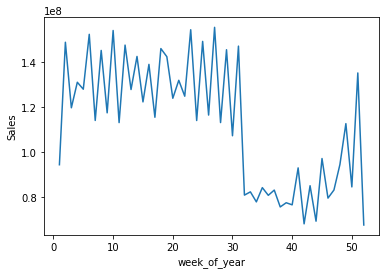

In [104]:
group_by_month = train_df.groupby(["week_of_year"]).sum().reset_index()
sns.lineplot(data=group_by_month, y="Sales", x="week_of_year")

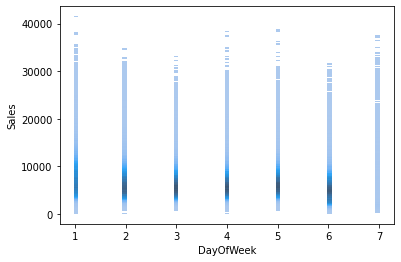

In [71]:
sns.histplot(data=train_df, y="Sales", x="DayOfWeek")

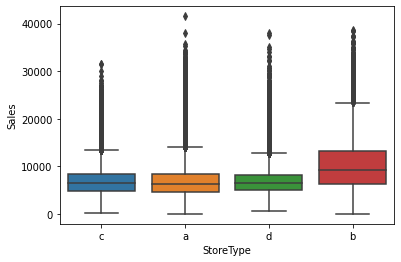

In [72]:
sns.boxplot(data=train_df, y="Sales", x="StoreType")

In [73]:
promo_df = train_df.groupby(["Promo"]).sum().reset_index()

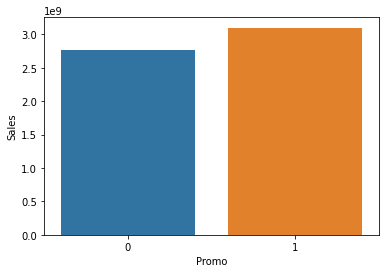

In [74]:
sns.barplot(data=promo_df, y="Sales", x="Promo")

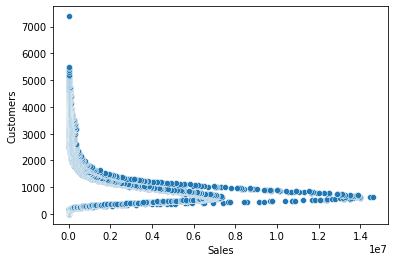

In [101]:
interesting_df = train_df.groupby(["Customers"]).sum().reset_index()
sns.scatterplot(data=interesting_df, y="Customers", x="Sales")

## **Contuining Model building Q8**
- Linear Regression
- Random Forest Regressor

In [75]:
y_pred, model = single_regression(X_train, X_test)
get_scores(X_train, X_test, y_pred, model)

Training score is 0.1579124941531468
Test score is 0.15815082535224478
Training RMSPE is 0.5148924734497871


## **Hyper Paramter tunings**
- n_estimators(Number of trees)
- max_depth(max depth of each tree)
- n_jobs(how many processes) -1 means max number
- min_samples_leaf(The minimum number of samples required to be at a leaf node)
- max_features(Randomly sample columns at each split)

Increasing the max_depth and the min_samples_leaf increases the training time. Other scores are printed below

## **Q9 - Also doing the t-test for individual model below-**

In [76]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train.values.ravel())
y_pred = m.predict(X_test)
y_pred = np.expand_dims(y_pred, axis=1)
validation_pred = m.predict(validation_split_df)
validation_pred = np.expand_dims(validation_pred, axis=1)
get_scores(X_train=X_train, X_test=X_test, y_pred=y_pred, m=m, is_validation_required=True, validation_pred=validation_pred)

Training score is 0.19314201278742615
Test score is 0.19186249184931703
Training RMSE is Sales    0.510875
dtype: float64
Validation score is 0.18645376121605872
Validation RMSPE is Sales    0.44517
dtype: float64


In [77]:
print(stats.ttest_ind(y_pred, y_test))

Ttest_indResult(statistic=array([1.81170525]), pvalue=array([0.07003274]))


In [78]:
m = RandomForestRegressor(n_estimators=40, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train.values.ravel())
y_pred = m.predict(X_test)
y_pred = np.expand_dims(y_pred, axis=1)
validation_pred = m.predict(validation_split_df)
validation_pred = np.expand_dims(validation_pred, axis=1)
get_scores(X_train=X_train, X_test=X_test, y_pred=y_pred, m=m, is_validation_required=True, validation_pred=validation_pred)

Training score is 0.19314201278742615
Test score is 0.19186249184931703
Training RMSE is Sales    0.510875
dtype: float64
Validation score is 0.18645376121605872
Validation RMSPE is Sales    0.44517
dtype: float64


In [79]:
print(stats.ttest_ind(y_pred, y_test))

Ttest_indResult(statistic=array([1.81170525]), pvalue=array([0.07003274]))


In [80]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=2, max_features=0.99, n_jobs=-1)
m.fit(X_train, y_train.values.ravel())
y_pred = m.predict(X_test)
y_pred = np.expand_dims(y_pred, axis=1)
validation_pred = m.predict(validation_split_df)
validation_pred = np.expand_dims(validation_pred, axis=1)
get_scores(X_train=X_train, X_test=X_test, y_pred=y_pred, m=m, is_validation_required=True, validation_pred=validation_pred)

Training score is 0.8994162137453833
Test score is 0.8169290516598184
Training RMSE is Sales    0.199402
dtype: float64
Validation score is 0.7189517782743449
Validation RMSPE is Sales    0.239818
dtype: float64


In [81]:
print(stats.ttest_ind(y_pred, y_test))

Ttest_indResult(statistic=array([-0.4420315]), pvalue=array([0.65846673]))


## **Q10-Doing the same preprocessing steps for the test dataframe**
- Use the linear regression model to predict and save the output as lr_answer.csv
- Use the random forest model to predict and save the output as rr_answer.csv

In [82]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [83]:
missing = test_df.isnull().sum()
missing.sort_values(ascending=False)

Open             11
SchoolHoliday     0
StateHoliday      0
Promo             0
Date              0
DayOfWeek         0
Store             0
Id                0
dtype: int64

In [84]:
test_df.fillna(0, inplace = True)
test_df = test_df.merge(right=store_df, on='Store', how='left')

In [85]:
test_df['Date'] = pd.to_datetime(test_df["Date"])
test_df["year"] = test_df["Date"].dt.year
test_df["month"] = test_df["Date"].dt.month
test_df["day"] = test_df["Date"].dt.day
test_df["week_of_year"] = test_df["Date"].dt.isocalendar().week
test_df["year_week"] = test_df["Date"].dt.strftime("%Y-%W")

In [86]:
test_df['CompetitionOpen'] = 12 * (test_df['year'] - test_df['CompetitionOpenSinceYear']) + (test_df['month'] - test_df['CompetitionOpenSinceMonth'])
test_df['CompetitionOpen'] = test_df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x)

In [87]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,week_of_year,year_week,CompetitionOpen
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,9,17,38,2015-37,84.0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,2015-37,105.0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0,2015,9,17,38,2015-37,29.0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0,2015,9,17,38,2015-37,11.0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0,2015,9,17,38,2015-37,181.0


In [88]:
test_features = ['DayOfWeek', 'Promo', 'Open', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen']

In [89]:
test_df = normalize_feature(test_df, ["DayOfWeek", "CompetitionDistance", "CompetitionOpen"])

In [90]:
test_df["StoreType"] = test_df['StoreType'].map(lambda x: 0 if x == "a" else (1 if x=="b" else (2 if x=="c" else 3)))
test_df["Assortment"] = test_df['Assortment'].map(lambda x: 0 if x == "a" else (1 if x=="b" else 2))
test_df["StateHoliday"] = test_df['StateHoliday'].map(lambda x: 0 if x == "0" else (1 if x=="1" else (2 if x=="2" else 3)))

In [91]:
answer = test_df[["Id"]].copy()
test_df = test_df[test_features]

In [92]:
test_df.head()

,DayOfWeek,Promo,Open,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen
0,0.5,1,1.0,0,0,2,0,0.016482,0.003473
1,0.5,1,1.0,0,0,0,0,0.186050,0.004341
2,0.5,1,1.0,0,0,0,2,0.316192,0.001199
3,0.5,1,1.0,0,0,0,0,0.098892,0.000455
4,0.5,1,1.0,0,0,0,2,0.026503,0.007483


In [93]:
y_pred_l_regg = model.predict(test_df)

In [94]:
answer["Sales"] = y_pred_l_regg
answer.to_csv(root_dir+"/lr_answer.csv",chunksize=1000, index=False)

In [95]:
y_pred_rr = m.predict(test_df)

In [96]:
answer["Sales"] = y_pred_l_regg
answer.to_csv(root_dir+"/rr_answer.csv",chunksize=1000, index=False)